In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore

# Using Neural Network
Use correct path for the files


In [34]:
# File paths for positive and negative reviews
pos_file = r'/content/drive/MyDrive/rt-polarity/rt-polarity.pos'
neg_file = r'/content/drive/MyDrive/rt-polarity/rt-polarity.neg'

# pos_file=r'/your_files/rt-polarity.pos'
# neg_file=r'/your_files/rt-polarity.neg'

# Reading reviews from files
with open(neg_file, 'r', encoding='latin-1') as neg_f:
    neg_reviews = neg_f.readlines()

with open(pos_file, 'r', encoding='latin-1') as pos_f:
    pos_reviews = pos_f.readlines()

In [35]:
# Creating dataframes for positive and negative reviews
neg_df = pd.DataFrame(neg_reviews, columns=["Review"])
neg_df['class'] = 0
pos_df = pd.DataFrame(pos_reviews, columns=["Review"])
pos_df['class'] = 1

In [36]:
# Splitting data into training, validation, and test sets
train_data = pd.concat([neg_df.iloc[:4000], pos_df.iloc[:4000]])
val_data = pd.concat([neg_df.iloc[4000:4500], pos_df.iloc[4000:4500]])
test_data = pd.concat([neg_df.iloc[4500:], pos_df.iloc[4500:]])

X_train, y_train = train_data['Review'], train_data['class']
X_val, y_val = val_data['Review'], val_data['class']
X_test, y_test = test_data['Review'], test_data['class']

In [37]:
# Applying TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_val = tfidf.transform(X_val)
X_test = tfidf.transform(X_test)

In [38]:
# Convert sparse matrix to dense matrix for use with Keras
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

In [39]:
# Building a neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluating the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5994 - loss: 0.6597 - val_accuracy: 0.7630 - val_loss: 0.4833
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8557 - loss: 0.3492 - val_accuracy: 0.7660 - val_loss: 0.4867
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9227 - loss: 0.2132 - val_accuracy: 0.7470 - val_loss: 0.5669
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9602 - loss: 0.1214 - val_accuracy: 0.7430 - val_loss: 0.7109
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9865 - loss: 0.0550 - val_accuracy: 0.7460 - val_loss: 0.8537
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9945 - loss: 0.0254 - val_accuracy: 0.7540 - val_loss: 1.0180
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9989 - loss: 0.0101 - val_accuracy: 0.7500 - val_loss: 1.1756
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9997 - loss: 0.0054 - val_accuracy: 0

In [41]:
# Calculating confusion matrix and metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
precision = precision * 100
recall = recall * 100
f1 = f1 * 100

In [42]:
# Printing final performance metrics
print("\nFinal Performance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.3f}%")
print(f"Recall: {recall:.3f}%")
print(f"F1-score: {f1:.3f}%")


Final Performance Metrics:
True Positives (TP): 598
True Negatives (TN): 639
False Positives (FP): 192
False Negatives (FN): 233
Precision: 75.696%
Recall: 71.961%
F1-score: 73.782%


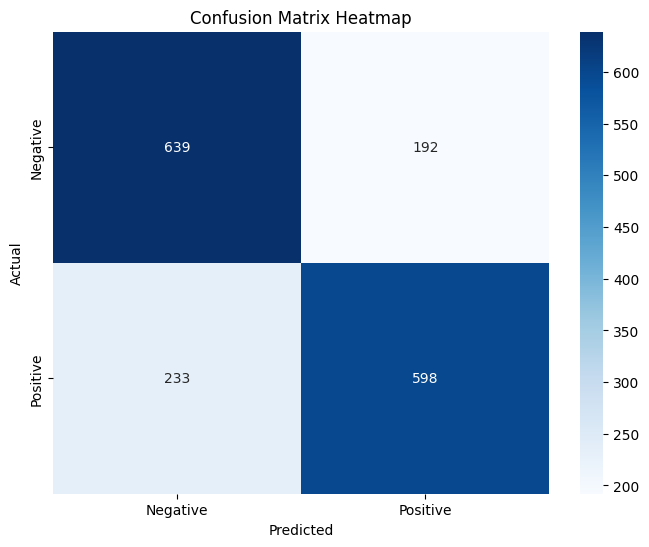

<Figure size 640x480 with 0 Axes>

In [43]:
# Plotting the confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()
# plt.savefig('/content/drive/MyDrive/rt-polarity/Result/confusion_matrix_heatmap.png', bbox_inches='tight', dpi=300)

# Using RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# File paths for positive and negative reviews
pos_file = r'/content/drive/MyDrive/rt-polarity/rt-polarity.pos'
neg_file = r'/content/drive/MyDrive/rt-polarity/rt-polarity.neg'

# pos_file=r'/your_files/rt-polarity.pos'
# neg_file=r'/your_files/rt-polarity.neg'

# Reading reviews from files
with open(neg_file, 'r', encoding='latin-1') as neg_f:
    neg_reviews = neg_f.readlines()

with open(pos_file, 'r', encoding='latin-1') as pos_f:
    pos_reviews = pos_f.readlines()

In [46]:
# Creating dataframes for positive and negative reviews
neg_df = pd.DataFrame(neg_reviews, columns=["Review"])
neg_df['class'] = 0
pos_df = pd.DataFrame(pos_reviews, columns=["Review"])
pos_df['class'] = 1

# Splitting data into training, validation, and test sets
train_data = pd.concat([neg_df.iloc[:4000], pos_df.iloc[:4000]])
val_data = pd.concat([neg_df.iloc[4000:4500], pos_df.iloc[4000:4500]])
test_data = pd.concat([neg_df.iloc[4500:], pos_df.iloc[4500:]])

X_train, y_train = train_data['Review'], train_data['class']
X_val, y_val = val_data['Review'], val_data['class']
X_test, y_test = test_data['Review'], test_data['class']

# Applying TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_val = tfidf.transform(X_val)
X_test = tfidf.transform(X_test)

In [47]:
# Training a RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predicting on validation set
val_pred = rf_clf.predict(X_val)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(y_val, val_pred, average='binary')

# Converting metrics to percentage
val_precision = val_precision * 100
val_recall = val_recall * 100
val_f1 = val_f1 * 100

# Predicting on test set
y_pred = rf_clf.predict(X_test)

In [48]:
# Calculating confusion matrix and metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
precision = precision * 100
recall = recall * 100
f1 = f1 * 100

# Printing final performance metrics
print("\nFinal Performance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.3f}%")
print(f"Recall: {recall:.3f}%")
print(f"F1-score: {f1:.3f}%")


Final Performance Metrics:
True Positives (TP): 587
True Negatives (TN): 588
False Positives (FP): 243
False Negatives (FN): 244
Precision: 70.723%
Recall: 70.638%
F1-score: 70.680%


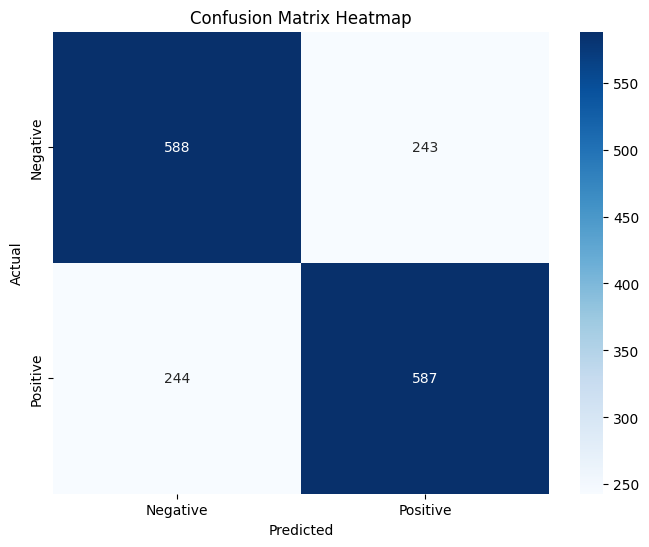

<Figure size 640x480 with 0 Axes>

In [50]:
# Plotting the confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()
# plt.savefig('/content/drive/MyDrive/rt-polarity/Result/confusion_matrix_heatmap_random.png', bbox_inches='tight', dpi=300)